## 引入新的数据增强包， image augmention

In [1]:
!pip install imgaug # 第一次使用需要pip install 添加image augmenttion的依赖

Looking in indexes: https://mirror.baidu.com/pypi/simple


In [2]:
## 检查包是否安装成功
from imgaug import augmenters as iaa

## 数据增强技术

利用计算机图形化的算法对原图，进行，仿射变换，扭曲拉伸，旋转，裁剪，模糊，颜色空间变换和对比度变换

## 数据增强-缩放

In [19]:
def zoom_img(img):
    # 得到一个图像的缩放器
    zoom = iaa.Affine(scale=(1.0,1.3))
    return zoom.augment_image(img)

In [6]:
import pandas as pd
data = pd.read_csv('info.csv')

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['center'],data['steering'],test_size=0.2,random_state=25)

In [9]:
print("训练集:{}条数据,测试集{}条数据".format(len(X_train),len(X_test)))

训练集:1100条数据,测试集276条数据


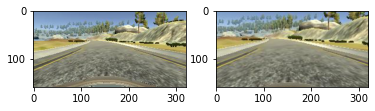

In [24]:
import numpy as np
import matplotlib.pyplot as plt
index = np.random.randint(0,len(X_train))

plt.subplot(121)# 在一行两列的图表中，第一个位置绘制原图
plt.imshow(plt.imread(X_train.iloc[index]))

plt.subplot(122)# 在一行两列的图表中，第二个位置绘制增强后的图
plt.imshow(zoom_img(plt.imread(X_train.iloc[index])))

## 数据增强 - 平移

In [25]:
def trans_img(img):
    # 得到一个图像的平移器
    trans = iaa.Affine(translate_percent={'x':(-0.1,0.1),'y':(-0.1,0.1)})
    return trans.augment_image(img)

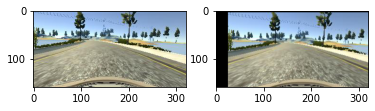

In [34]:
import numpy as np
import matplotlib.pyplot as plt
index = np.random.randint(0,len(X_train))

plt.subplot(121)# 在一行两列的图表中，第一个位置绘制原图
plt.imshow(plt.imread(X_train.iloc[index]))

plt.subplot(122)# 在一行两列的图表中，第二个位置绘制增强后的图
plt.imshow(trans_img(plt.imread(X_train.iloc[index])))

## 数据增强-光照或者亮度变换

In [35]:
def img_random_brightness(img):
    #亮度变换的数据增强器
    brightness = iaa.Multiply((0.3,1.2))
    return brightness.augment_image(img)

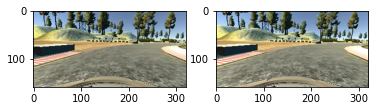

In [43]:
import numpy as np
import matplotlib.pyplot as plt
index = np.random.randint(0,len(X_train))

plt.subplot(121)# 在一行两列的图表中，第一个位置绘制原图
plt.imshow(plt.imread(X_train.iloc[index]))

plt.subplot(122)# 在一行两列的图表中，第二个位置绘制增强后的图
plt.imshow(img_random_brightness(plt.imread(X_train.iloc[index])))

## 数据增强 高斯模糊

In [46]:
def img_gaussian_blur(img):
    #高斯模糊的数据增强器
    gaussian_blur = iaa.GaussianBlur(sigma=(0.1,3))
    return gaussian_blur.augment_image(img)

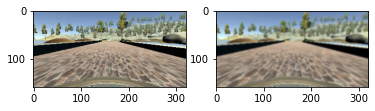

In [47]:
import numpy as np
import matplotlib.pyplot as plt
index = np.random.randint(0,len(X_train))

plt.subplot(121)# 在一行两列的图表中，第一个位置绘制原图
plt.imshow(plt.imread(X_train.iloc[index]))

plt.subplot(122)# 在一行两列的图表中，第二个位置绘制增强后的图
plt.imshow(img_gaussian_blur(plt.imread(X_train.iloc[index])))

## 数据增强 -运动模糊

In [48]:
def img_motion_blur(img):
    #高斯模糊的数据增强器
    motion_blur = iaa.MotionBlur()
    return motion_blur.augment_image(img)

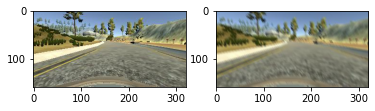

In [53]:
import numpy as np
import matplotlib.pyplot as plt
index = np.random.randint(0,len(X_train))

plt.subplot(121)# 在一行两列的图表中，第一个位置绘制原图
plt.imshow(plt.imread(X_train.iloc[index]))

plt.subplot(122)# 在一行两列的图表中，第二个位置绘制增强后的图
plt.imshow(img_motion_blur(plt.imread(X_train.iloc[index])))

## 数据增强，镜像变换

In [65]:
def img_flip(img,steering_angle):
    #高斯模糊的数据增强器
    flip = iaa.Fliplr(1.0)
    return flip.augment_image(img),-steering_angle

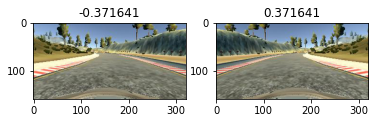

In [75]:
import numpy as np
import matplotlib.pyplot as plt
index = np.random.randint(0,len(X_train))

fig,axs = plt.subplots(1,2)
axs[0].set_title(str(y_train.iloc[index]))
axs[0].imshow(plt.imread(X_train.iloc[index]))

new_img , new_angle = img_flip(plt.imread(X_train.iloc[index]),y_train.iloc[index])


axs[1].set_title(str(new_angle))
axs[1].imshow(new_img)

## 自定义一个完整的数据增强器

In [76]:
from imgaug import augmenters as iaa
import numpy as np

def zoom_img(img):
    # 得到一个图像的缩放器
    zoom = iaa.Affine(scale=(1.0,1.3))
    return zoom.augment_image(img)
def trans_img(img):
    # 得到一个图像的平移器
    trans = iaa.Affine(translate_percent={'x':(-0.1,0.1),'y':(-0.1,0.1)})
    return trans.augment_image(img)
def img_random_brightness(img):
    #亮度变换的数据增强器
    brightness = iaa.Multiply((0.3,1.2))
    return brightness.augment_image(img)
def img_gaussian_blur(img):
    #高斯模糊的数据增强器
    gaussian_blur = iaa.GaussianBlur(sigma=(0.1,3))
    return gaussian_blur.augment_image(img)
def img_motion_blur(img):
    #高斯模糊的数据增强器
    motion_blur = iaa.MotionBlur()
    return motion_blur.augment_image(img)
def img_flip(img,steering_angle):
    #高斯模糊的数据增强器
    flip = iaa.Fliplr(1.0)
    return flip.augment_image(img),-steering_angle

## 自定义组合算法， 随机的数据增强。
## path，图片路径。 steering_angle方向盘角度
def random_augment(path,steering_angle):
    image = plt.imread(path)
    if np.random.rand()<0.5:
        image = zoom_img(image)
    if np.random.rand()<0.5:
        image = trans_img(image)
    if np.random.rand()<0.5:
        image = img_random_brightness(image)
    if np.random.rand()<0.5:
        image = img_gaussian_blur(image)
    if np.random.rand()<0.5:
        image = img_motion_blur(image)
    if np.random.rand()<0.5:
        image,steering_angle = img_flip(image,steering_angle)   
    return image,steering_angle

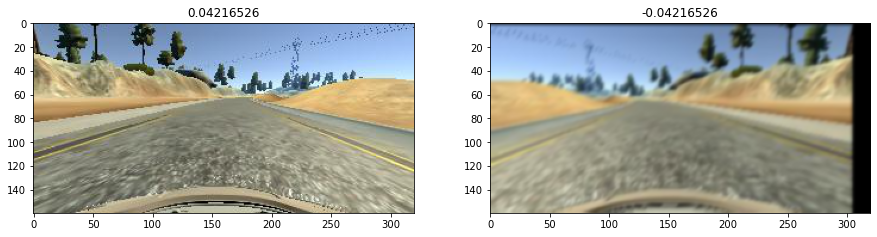

In [87]:
import numpy as np
import matplotlib.pyplot as plt
index = np.random.randint(0,len(X_train))

fig,axs = plt.subplots(1,2,figsize=(15,10))
axs[0].set_title(str(y_train.iloc[index]))
axs[0].imshow(plt.imread(X_train.iloc[index]))

new_img , new_angle = random_augment((X_train.iloc[index]),y_train.iloc[index])


axs[1].set_title(str(new_angle))
axs[1].imshow(new_img)

## yield关键字

In [100]:
# yield理解成是一个特殊的return
def test():
    print("test staring ")
    i = 1
    while True:
        i = i+1
        yield i

In [101]:
g = test()

In [102]:
next(g)

test staring 


2

In [103]:
next(g)

3

In [104]:
next(g)

4

## 编写一个数据增强图片的生成器

In [108]:
path = './a.jpg' #  为了测试方便，指定一张图片的路径
angle = -0.2
#训练集数据的生成器， batch_size一次生成的训练集数据数量
def train_batch_generator(batch_size):
    while True:
        batch_img = [] # 批量生成的图片
        batch_angle = [] # 每个图片对应一个角度

        for i in range(batch_size):
            newimg, newangle = random_augment(path,angle)
            batch_img.append(newimg)
            batch_angle.append(newangle)
        yield np.array(batch_img),np.array(batch_angle)

In [109]:
g = train_batch_generator(10)

In [111]:
next(g)

(array([[[[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         ...,
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [131, 132, 118],
          [134, 135, 121],
          [131, 132, 118]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [107, 108,  94],
          [123, 124, 110],
          [137, 138, 124]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
   